In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the IMDB dataset
vocab_size = 10000
max_len = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to make them uniform in length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build the RNN model
model = Sequential([
    Embedding(vocab_size, 128),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/3
157/157 [==============================] - 120s 741ms/step - loss: 0.4341 - accuracy: 0.7902 - val_loss: 0.3227 - val_accuracy: 0.8696
Epoch 2/3
157/157 [==============================] - 115s 733ms/step - loss: 0.2359 - accuracy: 0.9105 - val_loss: 0.3210 - val_accuracy: 0.8772
Epoch 3/3
782/782 [==============================] - 80s 102ms/step - loss: 0.4036 - accuracy: 0.8544
Test Accuracy: 0.8544399738311768


Epoch 1/3
157/157 [==============================] - 134s 850ms/step - loss: 0.1528 - accuracy: 0.9441 - val_loss: 0.3909 - val_accuracy: 0.8522
Epoch 2/3
157/157 [==============================] - 115s 734ms/step - loss: 0.1016 - accuracy: 0.9646 - val_loss: 0.4975 - val_accuracy: 0.8624
Epoch 3/3
157/157 [==============================] - 116s 741ms/step - loss: 0.0793 - accuracy: 0.9730 - val_loss: 0.5352 - val_accuracy: 0.8678


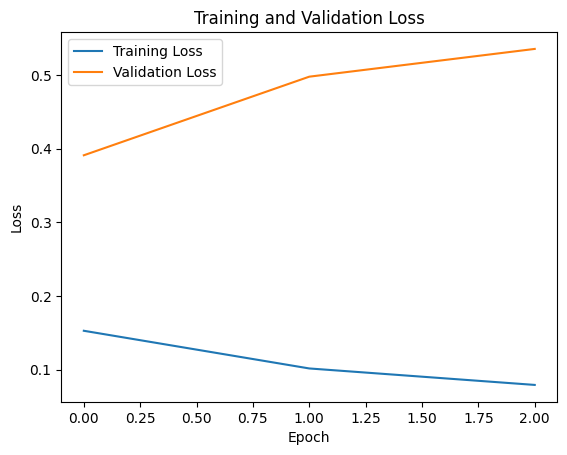

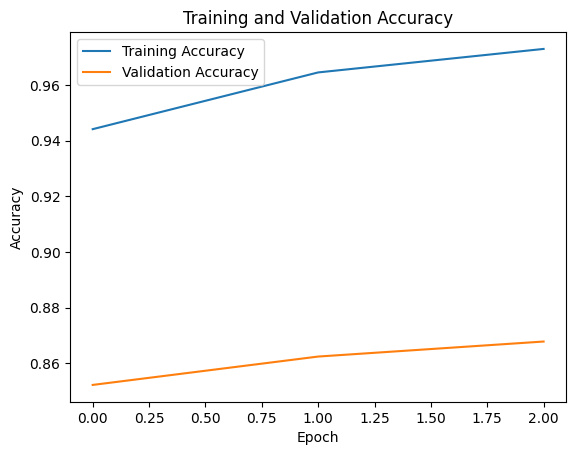

782/782 [==============================] - 84s 108ms/step - loss: 0.6066 - accuracy: 0.8460
Test Accuracy: 0.8459600210189819


In [2]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

